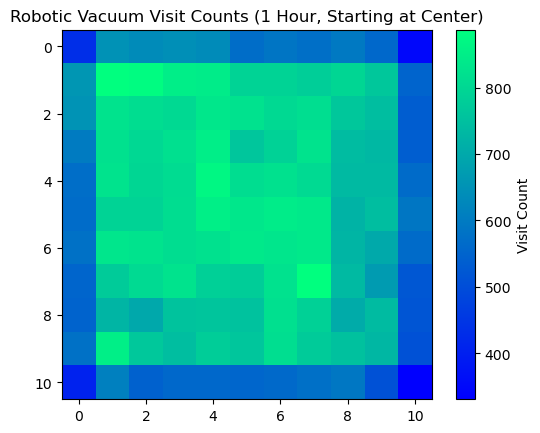

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the grid and visit counts
grid_size = 11
visit_counts = np.zeros((grid_size, grid_size))

# Define the starting position (center grid)
position = [grid_size // 2, grid_size // 2]

# Define the number of seconds in the simulation (1 hour)
num_seconds = 86400

# Run the simulation
for _ in range(num_seconds):
    # Update visit counts
    visit_counts[position[0], position[1]] += 1
    
    # Determine the next move
    moves = []
    if position[0] > 0:
        moves.append('up')
    if position[0] < grid_size - 1:
        moves.append('down')
    if position[1] > 0:
        moves.append('left')
    if position[1] < grid_size - 1:
        moves.append('right')
    move = np.random.choice(moves)
    
    # Update position
    if move == 'up':
        position[0] -= 1
    elif move == 'down':
        position[0] += 1
    elif move == 'left':
        position[1] -= 1
    elif move == 'right':
        position[1] += 1

# Plot the visit counts
plt.imshow(visit_counts, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Visit Count')
plt.title('Robotic Vacuum Visit Counts (1 Hour, Starting at Center)')
plt.show()

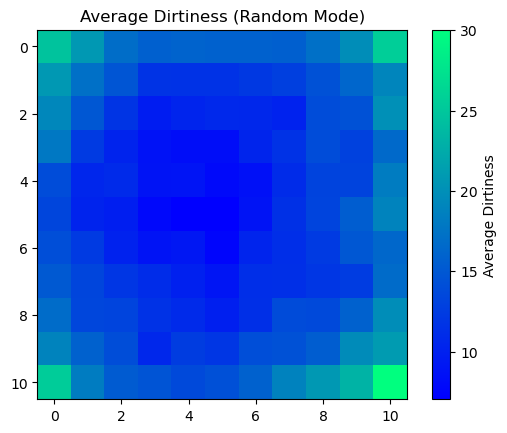

Random Mode: Central=11.7169894363119, Side=17.351130723943772, Corner=26.42698661941928


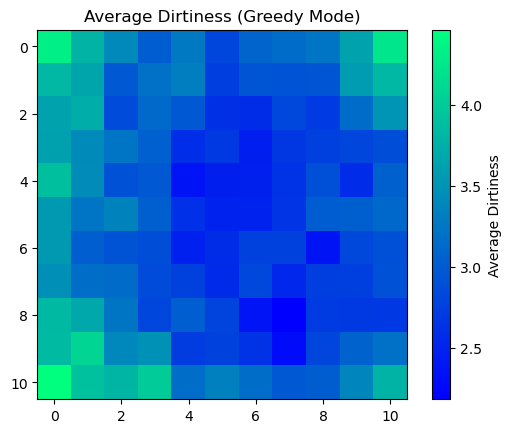

Greedy Mode: Central=2.886078898945469, Side=3.3706856534361505, Corner=4.200358143099095


In [2]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 11
num_trials = 100
runtime = 3600  # seconds

dirtiness_values = {
    'random': np.zeros((num_trials, grid_size, grid_size)),
    'greedy': np.zeros((num_trials, grid_size, grid_size))
}

for mode in ['random', 'greedy']:
    for trial in range(num_trials):
        dirtiness = np.zeros((grid_size, grid_size))
        position = (grid_size // 2, grid_size // 2)  # Starting in the center
        for _ in range(runtime):  
            # Contaminate 10 random grids each second
            for _ in range(10):
                i, j = np.random.randint(0, grid_size, size=2)
                dirtiness[i, j] += np.random.uniform(0, 1)
                
            # Movement behavior
            moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up
            if mode == 'random':
                move = moves[np.random.randint(0, len(moves))]  # Choose a random move
                # Update position, ensuring it stays within bounds
                position = (max(0, min(grid_size - 1, position[0] + move[0])),
                            max(0, min(grid_size - 1, position[1] + move[1])))
            elif mode == 'greedy':
                # Check all possible positions and move to the dirtiest
                best_move = position
                max_dirt = -1
                for move in moves:
                    new_position = (position[0] + move[0], position[1] + move[1])
                    if 0 <= new_position[0] < grid_size and 0 <= new_position[1] < grid_size:
                        if dirtiness[new_position] > max_dirt:
                            max_dirt = dirtiness[new_position]
                            best_move = new_position
                position = best_move
                
            # Clean the current grid
            dirtiness[position] = 0
            
        dirtiness_values[mode][trial] = dirtiness

for mode in ['random', 'greedy']:
    average_dirtiness = np.mean(dirtiness_values[mode], axis=0)
    plt.figure()
    plt.imshow(average_dirtiness, cmap='winter', interpolation='nearest')
    plt.colorbar(label='Average Dirtiness')
    plt.title(f'Average Dirtiness ({mode.capitalize()} Mode)')
    plt.show()

    # Calculate the dirtiness of central, side, and corner grids
    central_dirtiness = np.mean(average_dirtiness[1:-1, 1:-1])
    side_dirtiness = (np.mean(average_dirtiness[0, 1:-1]) +
                      np.mean(average_dirtiness[-1, 1:-1]) +
                      np.mean(average_dirtiness[1:-1, 0]) +
                      np.mean(average_dirtiness[1:-1, -1])) / 4
    corner_dirtiness = (average_dirtiness[0, 0] +
                        average_dirtiness[0, -1] +
                        average_dirtiness[-1, 0] +
                        average_dirtiness[-1, -1]) / 4
    print(f'{mode.capitalize()} Mode: Central={central_dirtiness}, Side={side_dirtiness}, Corner={corner_dirtiness}')

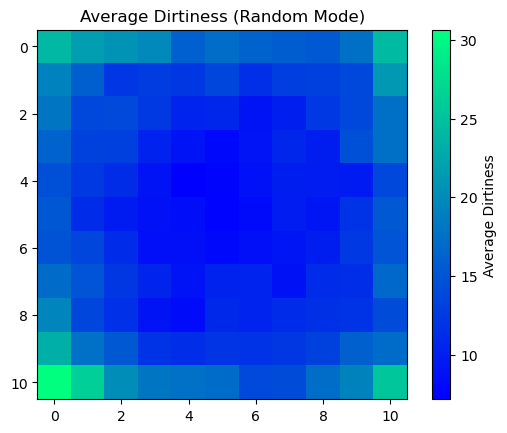

Random Mode: Central=11.11423243127961, Side=17.510256034161994, Corner=26.119946336488052


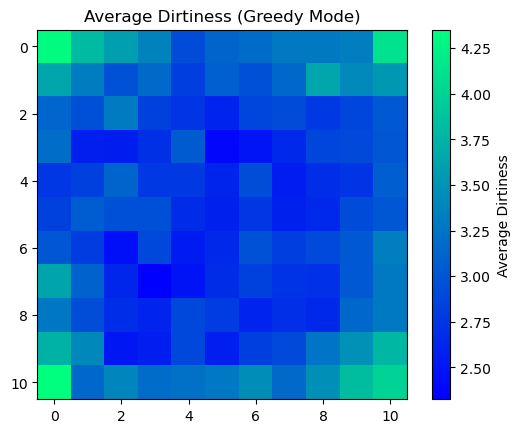

Greedy Mode: Central=2.8395204619275813, Side=3.2943697429889762, Corner=4.1947926623305944


In [3]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 11
num_trials = 100
runtime = 28800  # seconds

dirtiness_values = {
    'random': np.zeros((num_trials, grid_size, grid_size)),
    'greedy': np.zeros((num_trials, grid_size, grid_size))
}

for mode in ['random', 'greedy']:
    for trial in range(num_trials):
        dirtiness = np.zeros((grid_size, grid_size))
        position = (grid_size // 2, grid_size // 2)  # Starting in the center
        for _ in range(runtime):  
            # Contaminate 10 random grids each second
            for _ in range(10):
                i, j = np.random.randint(0, grid_size, size=2)
                dirtiness[i, j] += np.random.uniform(0, 1)
                
            # Movement behavior
            moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up
            if mode == 'random':
                move = moves[np.random.randint(0, len(moves))]  # Choose a random move
                # Update position, ensuring it stays within bounds
                position = (max(0, min(grid_size - 1, position[0] + move[0])),
                            max(0, min(grid_size - 1, position[1] + move[1])))
            elif mode == 'greedy':
                # Check all possible positions and move to the dirtiest
                best_move = position
                max_dirt = -1
                for move in moves:
                    new_position = (position[0] + move[0], position[1] + move[1])
                    if 0 <= new_position[0] < grid_size and 0 <= new_position[1] < grid_size:
                        if dirtiness[new_position] > max_dirt:
                            max_dirt = dirtiness[new_position]
                            best_move = new_position
                position = best_move
                
            # Clean the current grid
            dirtiness[position] = 0
            
        dirtiness_values[mode][trial] = dirtiness

for mode in ['random', 'greedy']:
    average_dirtiness = np.mean(dirtiness_values[mode], axis=0)
    plt.figure()
    plt.imshow(average_dirtiness, cmap='winter', interpolation='nearest')
    plt.colorbar(label='Average Dirtiness')
    plt.title(f'Average Dirtiness ({mode.capitalize()} Mode)')
    plt.show()

    # Calculate the dirtiness of central, side, and corner grids
    central_dirtiness = np.mean(average_dirtiness[1:-1, 1:-1])
    side_dirtiness = (np.mean(average_dirtiness[0, 1:-1]) +
                      np.mean(average_dirtiness[-1, 1:-1]) +
                      np.mean(average_dirtiness[1:-1, 0]) +
                      np.mean(average_dirtiness[1:-1, -1])) / 4
    corner_dirtiness = (average_dirtiness[0, 0] +
                        average_dirtiness[0, -1] +
                        average_dirtiness[-1, 0] +
                        average_dirtiness[-1, -1]) / 4
    print(f'{mode.capitalize()} Mode: Central={central_dirtiness}, Side={side_dirtiness}, Corner={corner_dirtiness}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 11
num_trials = 100
runtime = 86400  # seconds

dirtiness_values = {
    'random': np.zeros((num_trials, grid_size, grid_size)),
    'greedy': np.zeros((num_trials, grid_size, grid_size))
}

for mode in ['random', 'greedy']:
    for trial in range(num_trials):
        dirtiness = np.zeros((grid_size, grid_size))
        position = (grid_size // 2, grid_size // 2)  # Starting in the center
        for _ in range(runtime):  
            # Contaminate 10 random grids each second
            for _ in range(10):
                i, j = np.random.randint(0, grid_size, size=2)
                dirtiness[i, j] += np.random.uniform(0, 1)
                
            # Movement behavior
            moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up
            if mode == 'random':
                move = moves[np.random.randint(0, len(moves))]  # Choose a random move
                # Update position, ensuring it stays within bounds
                position = (max(0, min(grid_size - 1, position[0] + move[0])),
                            max(0, min(grid_size - 1, position[1] + move[1])))
            elif mode == 'greedy':
                # Check all possible positions and move to the dirtiest
                best_move = position
                max_dirt = -1
                for move in moves:
                    new_position = (position[0] + move[0], position[1] + move[1])
                    if 0 <= new_position[0] < grid_size and 0 <= new_position[1] < grid_size:
                        if dirtiness[new_position] > max_dirt:
                            max_dirt = dirtiness[new_position]
                            best_move = new_position
                position = best_move
                
            # Clean the current grid
            dirtiness[position] = 0
            
        dirtiness_values[mode][trial] = dirtiness

for mode in ['random', 'greedy']:
    average_dirtiness = np.mean(dirtiness_values[mode], axis=0)
    plt.figure()
    plt.imshow(average_dirtiness, cmap='winter', interpolation='nearest')
    plt.colorbar(label='Average Dirtiness')
    plt.title(f'Average Dirtiness ({mode.capitalize()} Mode)')
    plt.show()

    # Calculate the dirtiness of central, side, and corner grids
    central_dirtiness = np.mean(average_dirtiness[1:-1, 1:-1])
    side_dirtiness = (np.mean(average_dirtiness[0, 1:-1]) +
                      np.mean(average_dirtiness[-1, 1:-1]) +
                      np.mean(average_dirtiness[1:-1, 0]) +
                      np.mean(average_dirtiness[1:-1, -1])) / 4
    corner_dirtiness = (average_dirtiness[0, 0] +
                        average_dirtiness[0, -1] +
                        average_dirtiness[-1, 0] +
                        average_dirtiness[-1, -1]) / 4
    print(f'{mode.capitalize()} Mode: Central={central_dirtiness}, Side={side_dirtiness}, Corner={corner_dirtiness}')